In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("C:\\Users\\IvS\\Git\\complex_stylized_supply_chain_model_generator")
sys.path.append("C:\\Users\\IvS\\Git\\kalibratietechnieken_structure")

from celibration.plugins.datatransforms.missing_values_sampler import MissingValuesSamplerDataTransform
from celibration.plugins.datatransforms.noise_sampler import NoiseSamplerDataTransform
from celibration.plugins.datatransforms.bias_sampler import BiasSamplerDataTransform

In [2]:
file_name = "../../complex_stylized_supply_chain_model_generator/data/20231208_FINAL_ComplexSimModelGraph_GT_CNHK_USA_EventTimeSeries_ManufacturingTime1.5_Runtime364.csv"

# Ground Truth

In [3]:
df_in= pd.read_csv(file_name)

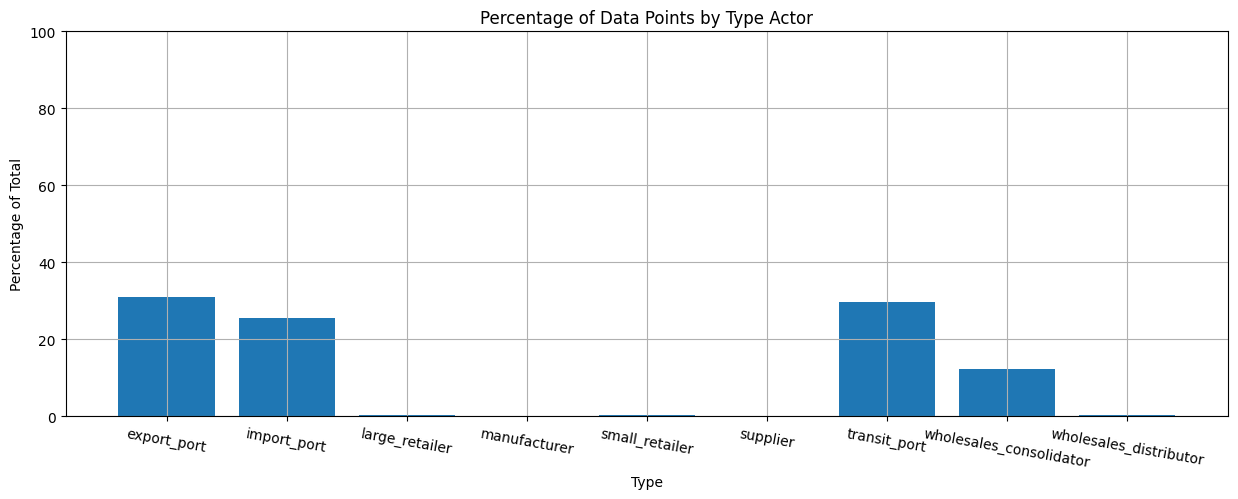

In [4]:
plt.figure(figsize=(15,5))
plt.grid()
# Group by
grouped_df = df_in.groupby("type")
# Get the count of each group
group_counts = grouped_df.size()
# Calculate the percentage for each group
percentage_per_group = (group_counts / len(df_in))*100
# Plot the percentages
plt.bar(percentage_per_group.index, percentage_per_group)
plt.xlabel('Type')
plt.xticks(rotation=-10)
plt.ylabel('Percentage of Total')
plt.title('Percentage of Data Points by Type Actor')
plt.ylim(0, 100)
plt.show()

In [5]:
percentage_per_group

type
export_port                31.137472
import_port                25.575460
large_retailer              0.364752
manufacturer                0.088929
small_retailer              0.481516
supplier                    0.033077
transit_port               29.750404
wholesales_consolidator    12.218641
wholesales_distributor      0.349750
dtype: float64

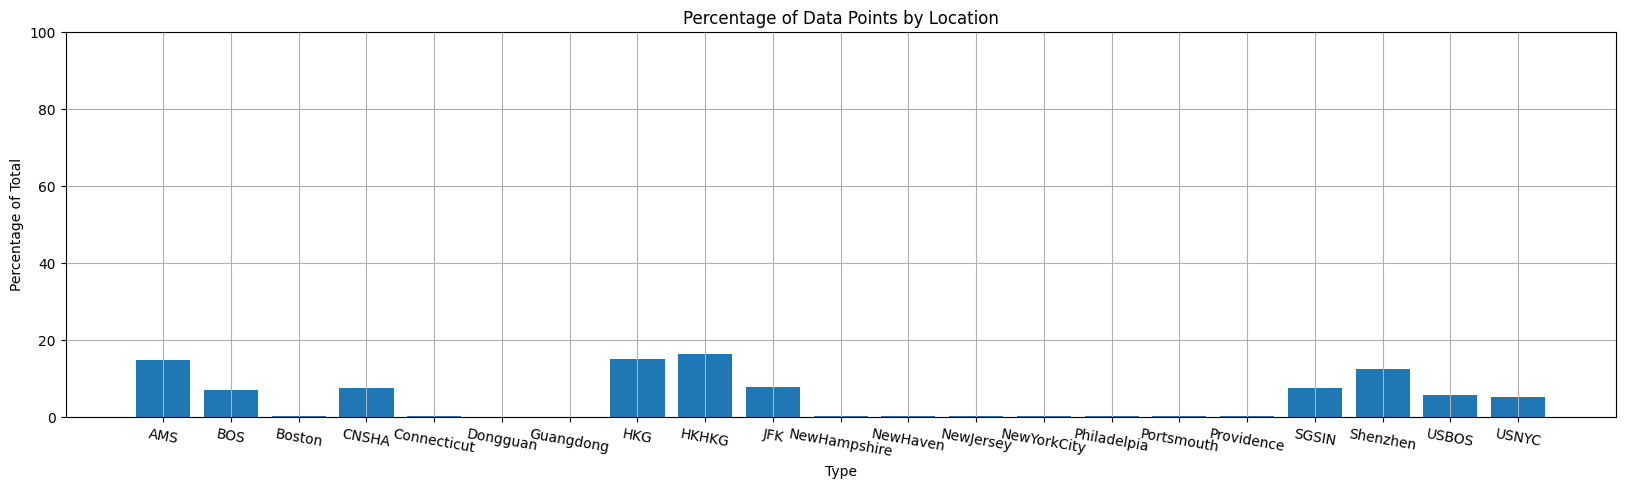

In [6]:
plt.figure(figsize=(20,5))
plt.grid()
# Group by
grouped_df = df_in.groupby("location")
# Get the count of each group
group_counts = grouped_df.size()
# Calculate the percentage for each group
percentage_per_group = (group_counts / len(df_in))*100
# Plot the percentages
plt.bar(percentage_per_group.index, percentage_per_group)
plt.xlabel('Type')
plt.xticks(rotation=-10)
plt.ylabel('Percentage of Total')
plt.title('Percentage of Data Points by Location')
plt.ylim(0, 100)
plt.show()

In [7]:
percentage_per_group

location
AMS             14.827394
BOS              7.047951
Boston           0.171531
CNSHA            7.460963
Connecticut      0.176592
Dongguan         0.010122
Guangdong        0.033077
HKG             14.962052
HKHKG           16.175421
JFK              7.726664
NewHampshire     0.093628
NewHaven         0.155264
NewJersey        0.094532
NewYorkCity      0.178219
Philadelpia      0.083145
Portsmouth       0.084771
Providence       0.158336
SGSIN            7.462047
Shenzhen        12.297448
USBOS            5.580449
USNYC            5.220396
dtype: float64

# Missing Values

In [8]:
mv_sampler = MissingValuesSamplerDataTransform({})

In [9]:
dict_mv = {0.0: {"len": len(df_in), "dataframe_nonan": df_in}}
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for perc in percentages:
    df_sparse = mv_sampler.transform(df_in, debug=False, columns_to_transform = ["quantity"], seed=2, percentage=perc)
    df_sparse_no_nan = df_sparse.dropna(subset=['quantity'])
    
    #Give len of dataframe
    dict_mv[perc] = {"len": len(df_sparse_no_nan),
                     "dataframe_full": df_sparse,
                     "dataframe_nonan": df_sparse_no_nan}

2024-03-05 10:00:59 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.10
2024-03-05 10:00:59 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.20
2024-03-05 10:01:00 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.30
2024-03-05 10:01:01 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.40
2024-03-05 10:01:02 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.50
2024-03-05 10:01:03 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.60
2024-03-05 10:01:05 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.70
2024-03-05 10:01:06 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.80
2024-03-05 10:01:09 TUD258786 root[20228] INFO Done: Missing values sampler with percentage 0.90


In [10]:
for k, v in dict_mv.items():
    print(f"Percentage {k}, length dataframe is: ", v["len"])

Percentage 0.0, length dataframe is:  553253
Percentage 0.1, length dataframe is:  497928
Percentage 0.2, length dataframe is:  442602
Percentage 0.3, length dataframe is:  387277
Percentage 0.4, length dataframe is:  331952
Percentage 0.5, length dataframe is:  276627
Percentage 0.6, length dataframe is:  221301
Percentage 0.7, length dataframe is:  165976
Percentage 0.8, length dataframe is:  110651
Percentage 0.9, length dataframe is:  55325


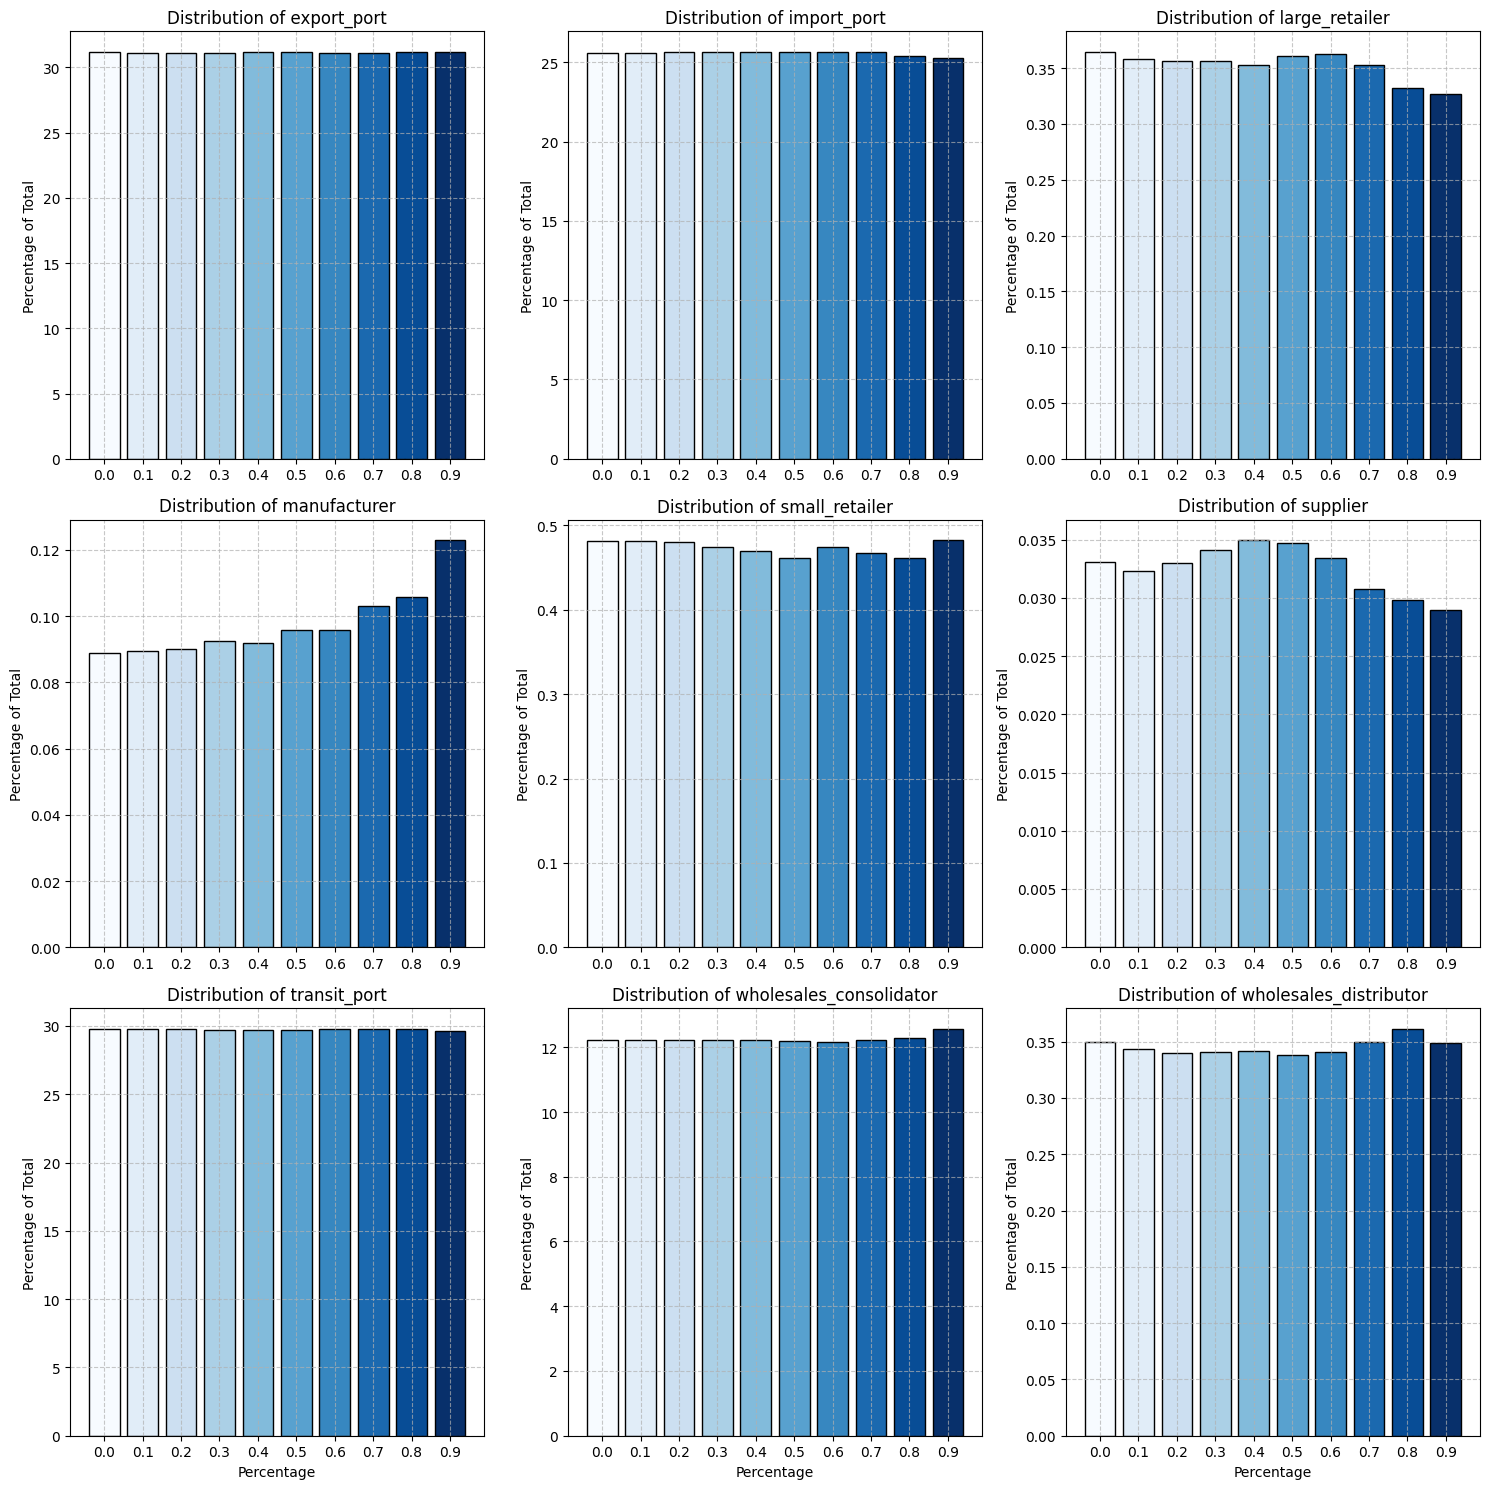

In [11]:
# Get unique types across all groups
all_types = sorted(set(type_ for v in dict_mv.values() for type_ in v['dataframe_nonan']['type'].unique()))

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)

# Initialize color cycle for plots
colors = plt.cm.Blues(np.linspace(0, 1, len(all_types)+1))

# Iterate through types and plot on separate subplots
for i, type_ in enumerate(all_types):
    # Initialize a list to store percentages for each group
    percentages_per_group = []
    
    # Iterate through groups
    for j, (k, v) in enumerate(dict_mv.items()):
        df_in_s = v["dataframe_nonan"]

        # Filter DataFrame for the current type
        df_type = df_in_s[df_in_s['type'] == type_]

        # Calculate the percentage for the current group
        percentage = (len(df_type) / len(df_in_s)) * 100

        # Append the percentage to the list
        percentages_per_group.append(percentage)

    # Convert 1D index i to 2D indices (row, col)
    row, col = divmod(i, 3)

    # Plot on the corresponding subplot
    bars = axes[row, col].bar(np.arange(len(dict_mv)), percentages_per_group, color=colors, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {type_}')
    axes[row, col].set_ylabel('Percentage of Total')

    # Customize x-axis labels for each subplot
    axes[row, col].set_xticks(np.arange(len(dict_mv)))
    axes[row, col].set_xticklabels(list(dict_mv.keys()))

# Customize x-axis labels on the last row of subplots
for ax in axes[-1, :]:
    ax.set_xlabel('Percentage')

# Add grid in the background
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Noise

In [12]:
noise_sampler = NoiseSamplerDataTransform({})

In [13]:
dict_n = {0: {"len": len(df_in), "dataframe_full": df_in}}
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for perc in percentages:
    df_sparse = noise_sampler.transform(df_in, debug=False, columns_to_transform = ["quantity"], seed=2, percentage=perc)
    
    #Give len of dataframe
    dict_n[perc] = {"len": len(df_sparse),
                     "dataframe_full": df_sparse}

2024-03-05 10:01:12 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.10 of the values
2024-03-05 10:01:13 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.20 of the values
2024-03-05 10:01:14 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.30 of the values
2024-03-05 10:01:16 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.40 of the values
2024-03-05 10:01:17 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.50 of the values
2024-03-05 10:01:19 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.60 of the values
2024-03-05 10:01:21 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.70 of the values
2024-03-05 10:01:23 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.80 of the values
2024-03-05 10:01:26 TUD258786 root[20228] INFO Done: Noise sampler percentage 0.90 of the values


In [14]:
for k, v in dict_n.items():
    merged_df = pd.merge(df_in, v["dataframe_full"])
    
    # Calculate the percentage of data points that are exactly the same
    percentage_same = (len(merged_df) / len(v["dataframe_full"])) * 100
    print(f"Percentage {k}, similar datapoints are: ", percentage_same)# Merge the dataframes on both 'type' and 'value'

Percentage 0, similar datapoints are:  100.0
Percentage 0.1, similar datapoints are:  90.00005422473986
Percentage 0.2, similar datapoints are:  79.99992770034686
Percentage 0.3, similar datapoints are:  69.99998192508671
Percentage 0.4, similar datapoints are:  60.00003614982658
Percentage 0.5, similar datapoints are:  50.00009037456643
Percentage 0.6, similar datapoints are:  39.99996385017343
Percentage 0.7, similar datapoints are:  30.00001807491329
Percentage 0.8, similar datapoints are:  20.000072299653144
Percentage 0.9, similar datapoints are:  9.999945775260143


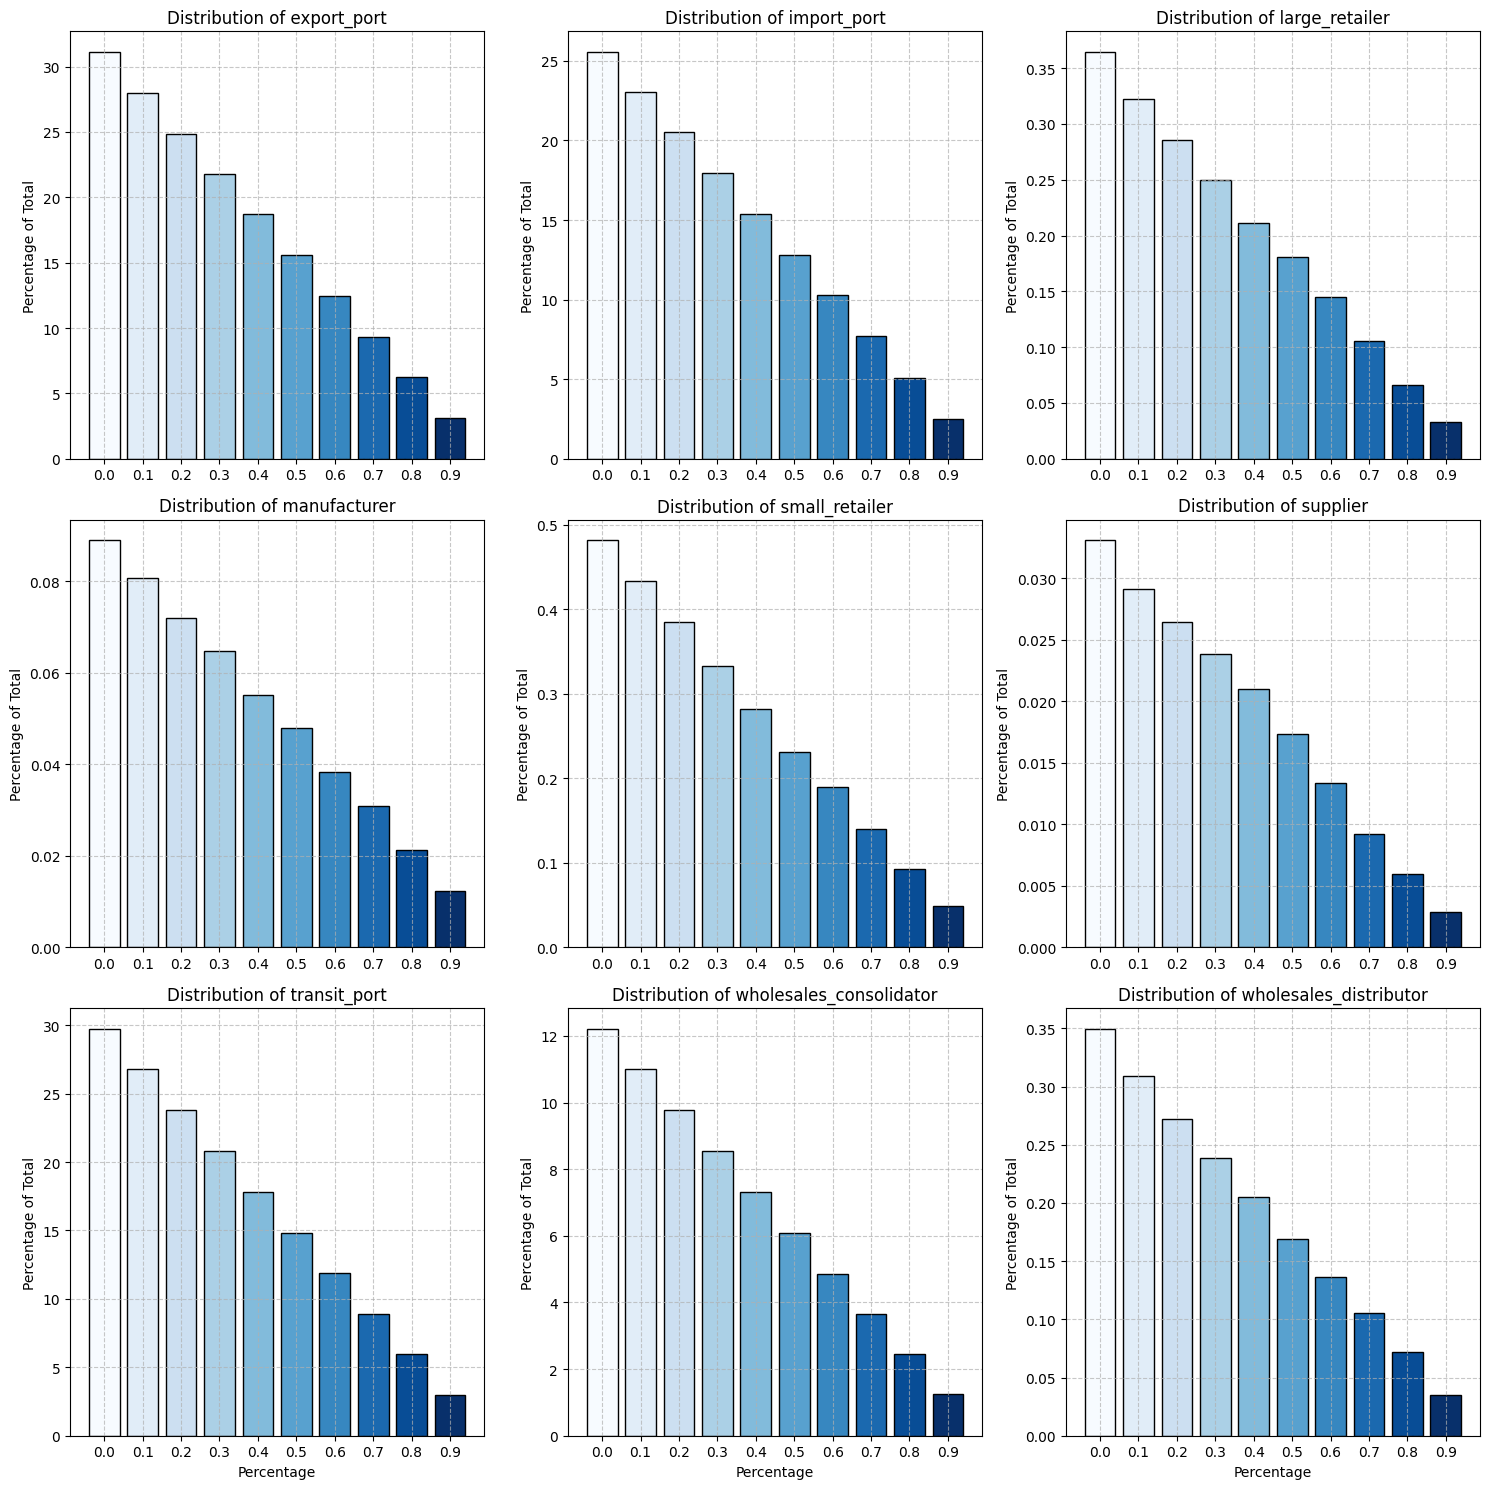

In [15]:
# Get unique types across all groups
all_types = sorted(set(type_ for v in dict_n.values() for type_ in v['dataframe_full']['type'].unique()))

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)

# Initialize color cycle for plots
colors = plt.cm.Blues(np.linspace(0, 1, len(all_types)+1))

# Iterate through types and plot on separate subplots
for i, type_ in enumerate(all_types):
    # Initialize a list to store percentages for each group
    percentages_per_group = []
    
    df_type_gt = df_in[df_in["type"] == type_]
    # Iterate through groups
    for j, (k, v) in enumerate(dict_n.items()):
        df_in_s = v["dataframe_full"]

        # Filter DataFrame for the current type
        df_type = df_in_s[df_in_s['type'] == type_]

        merged_df_type = pd.merge(df_type_gt, df_type)

        # Calculate the percentage for the current group
        percentage = (len(merged_df_type) / len(df_in)) * 100

        # Append the percentage to the list
        percentages_per_group.append(percentage)

    # Convert 1D index i to 2D indices (row, col)
    row, col = divmod(i, 3)

    # Plot on the corresponding subplot
    bars = axes[row, col].bar(np.arange(len(dict_mv)), percentages_per_group, color=colors, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {type_}')
    axes[row, col].set_ylabel('Percentage of Total')

    # Customize x-axis labels for each subplot
    axes[row, col].set_xticks(np.arange(len(dict_mv)))
    axes[row, col].set_xticklabels(list(dict_mv.keys()))

# Customize x-axis labels on the last row of subplots
for ax in axes[-1, :]:
    ax.set_xlabel('Percentage')

# Add grid in the background
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Bias

In [16]:
bias_sampler = BiasSamplerDataTransform({})

In [17]:
dict_b = {0.0: {"len": len(df_in), "dataframe_full": df_in}}
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for perc in percentages:
    df_sparse = bias_sampler.transform(df_in, debug=False, columns_to_transform = ["quantity"], seed=2, percentage=perc)
    
    #Give len of dataframe
    dict_b[perc] = {"len": len(df_sparse),
                     "dataframe_full": df_sparse}

2024-03-05 10:01:41 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.10 of the values
2024-03-05 10:01:42 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.20 of the values
2024-03-05 10:01:42 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.30 of the values
2024-03-05 10:01:42 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.40 of the values
2024-03-05 10:01:42 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.50 of the values
2024-03-05 10:01:42 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.60 of the values
2024-03-05 10:01:43 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.70 of the values
2024-03-05 10:01:43 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.80 of the values
2024-03-05 10:01:43 TUD258786 root[20228] INFO Done: Bias sampler percentage 0.90 of the values


In [37]:
# for k, v in dict_b.items():
#     # Create a boolean mask indicating whether the 'quantity' values are the same for each index
#     in_both_mask = [df_in.at[i, 'quantity'] == v['dataframe_full'].at[i, 'quantity'] for i in df_in.index]

#     # Calculate the percentage of True values in the mask
#     percentage_same = sum(in_both_mask) / len(df_in) * 100

#     print(f"Percentage {k}, similar datapoints are: {percentage_same:.2f}%")

In [38]:
a = df_in.groupby("type").sum()

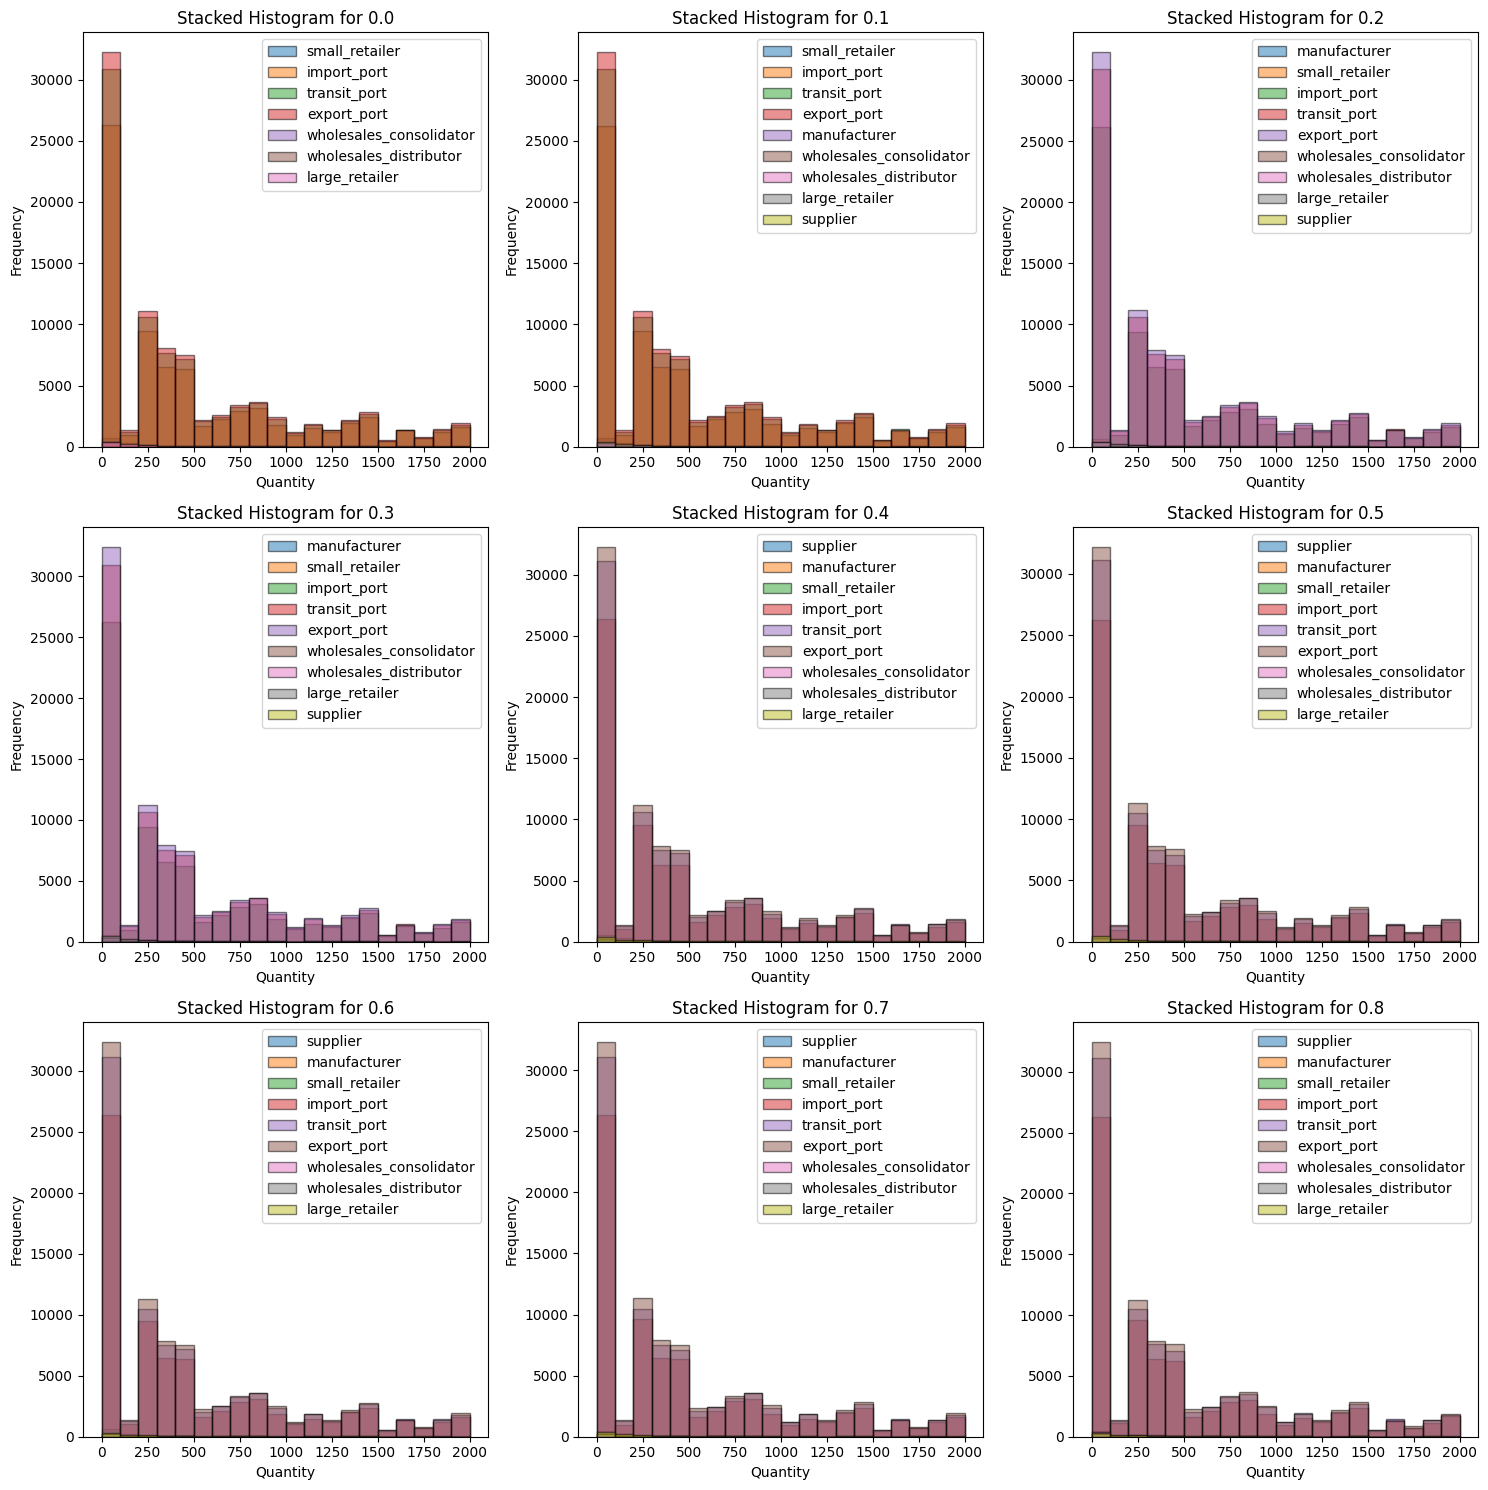

In [51]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Iterate through the dictionary items and create stacked histograms for each 'type'
for (k, v), ax in zip(dict_b.items(), axes.flatten()):
    df = v['dataframe_full']
    df = df[df['quantity'] < 20000]

    # Get unique types
    types = df['type'].unique()

    # Create a histogram for each 'type'
    for type_label in types:
        data_type = df[df['type'] == type_label]['quantity']
        bins = range(0, 2100, 100)  # Define your bins
        count, b, bars = ax.hist(data_type, bins=bins, alpha=0.5, label=type_label, stacked=True, edgecolor='black')
        # print("percentage", k, type_label, count)

    ax.set_title(f'Stacked Histogram for {k}')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()